# Challenge Alura Store

## **Esse desafio inicial é para ajudar o sr. João a idenficar qual loja ele pode vender para levantar fundos para investimentos futuros.**
* Obs.: Isso está sendo feito com base nas informações passadas nos arquivos csv disponibilizados.

### Importação dos dados



In [15]:
# Importando o pandas
import pandas as pd
# Importando os arquivos csv
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
# Visualizando um dos DataFrames
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [16]:
# Visualizando os nomes das colunas
print(loja.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


#1. Análise do faturamento


In [17]:
# Análise do Faturamento (Soma da coluna 'Preço')
faturamento_loja1 = loja['Preço'].sum()
print(f"Faturamento Loja 1: R$ {faturamento_loja1:.2f}")

faturamento_loja2 = loja2['Preço'].sum()
print(f"Faturamento Loja 2: R$ {faturamento_loja2:.2f}")

faturamento_loja3 = loja3['Preço'].sum()
print(f"Faturamento Loja 3: R$ {faturamento_loja3:.2f}")

faturamento_loja4 = loja4['Preço'].sum()
print(f"Faturamento Loja 4: R$ {faturamento_loja4:.2f}")

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


/tmp/ipython-input-2043687328.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Faturamento', y='Loja', data=faturamento_total, palette="viridis", ax=axes_faturamento[0])


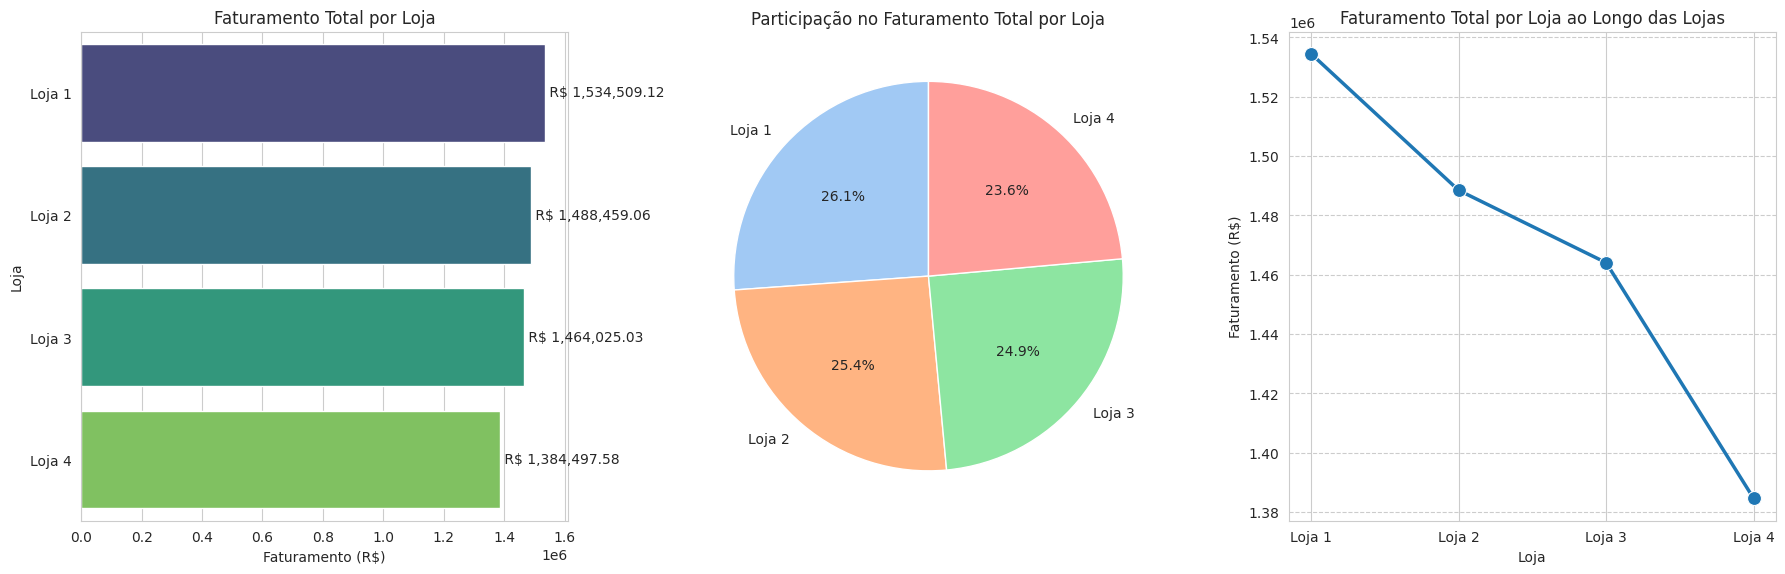

In [18]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

faturamento_total = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# Gráficos de Faturamento
fig_faturamento, axes_faturamento = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Faturamento', y='Loja', data=faturamento_total, palette="viridis", ax=axes_faturamento[0])
axes_faturamento[0].set_title('Faturamento Total por Loja')
axes_faturamento[0].set_xlabel('Faturamento (R$)')
axes_faturamento[0].set_ylabel('Loja')
for index, value in enumerate(faturamento_total['Faturamento']):
    axes_faturamento[0].text(value, index, f' R$ {value:,.2f}', va='center')

axes_faturamento[1].pie(faturamento_total['Faturamento'], labels=faturamento_total['Loja'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes_faturamento[1].set_title('Participação no Faturamento Total por Loja')

sns.lineplot(x='Loja', y='Faturamento', data=faturamento_total, marker='o', linewidth=2.5, markersize=10, ax=axes_faturamento[2])
axes_faturamento[2].set_title('Faturamento Total por Loja ao Longo das Lojas')
axes_faturamento[2].set_xlabel('Loja')
axes_faturamento[2].set_ylabel('Faturamento (R$)')
axes_faturamento[2].grid(axis='y', linestyle='--')

fig_faturamento.subplots_adjust(wspace=0.4) # Adicionado para o espaçamento

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [19]:
# Vendas por Categoria (baseado no faturamento)
vendas_categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 1:\n", vendas_categoria_loja1)

vendas_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 2:\n", vendas_categoria_loja2)

vendas_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 3:\n", vendas_categoria_loja3)

vendas_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print("\nVendas por Categoria - Loja 4:\n", vendas_categoria_loja4)


Vendas por Categoria - Loja 1:
 Categoria do Produto
eletronicos              572659.23
eletrodomesticos         484913.36
moveis                   250178.11
instrumentos musicais    121731.69
esporte e lazer           52387.55
brinquedos                23993.78
utilidades domesticas     16931.48
livros                    11713.92
Name: Preço, dtype: float64

Vendas por Categoria - Loja 2:
 Categoria do Produto
eletronicos              547773.71
eletrodomesticos         464758.13
moveis                   235234.68
instrumentos musicais    139987.03
esporte e lazer           46326.09
brinquedos                21262.21
utilidades domesticas     19662.86
livros                    13454.35
Name: Preço, dtype: float64

Vendas por Categoria - Loja 3:
 Categoria do Produto
eletronicos              547699.92
eletrodomesticos         438984.89
moveis                   268095.56
instrumentos musicais    103174.45
esporte e lazer           47456.10
brinquedos                25869.20
utilidades d

/tmp/ipython-input-3676240183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


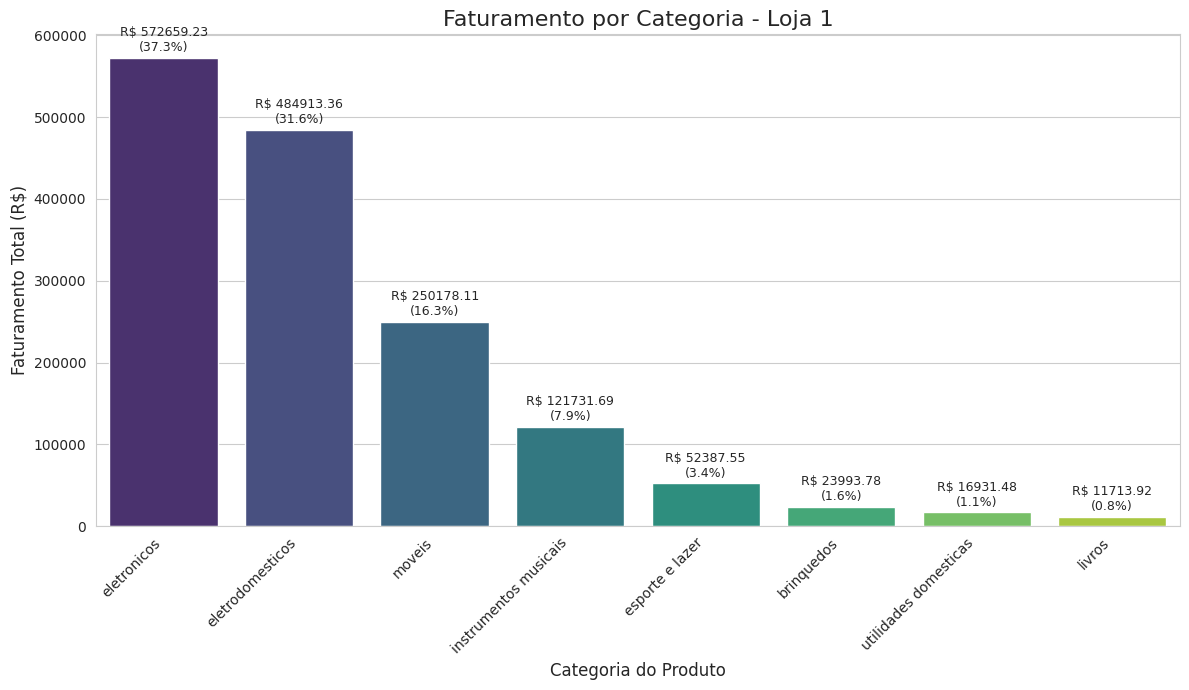

/tmp/ipython-input-3676240183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


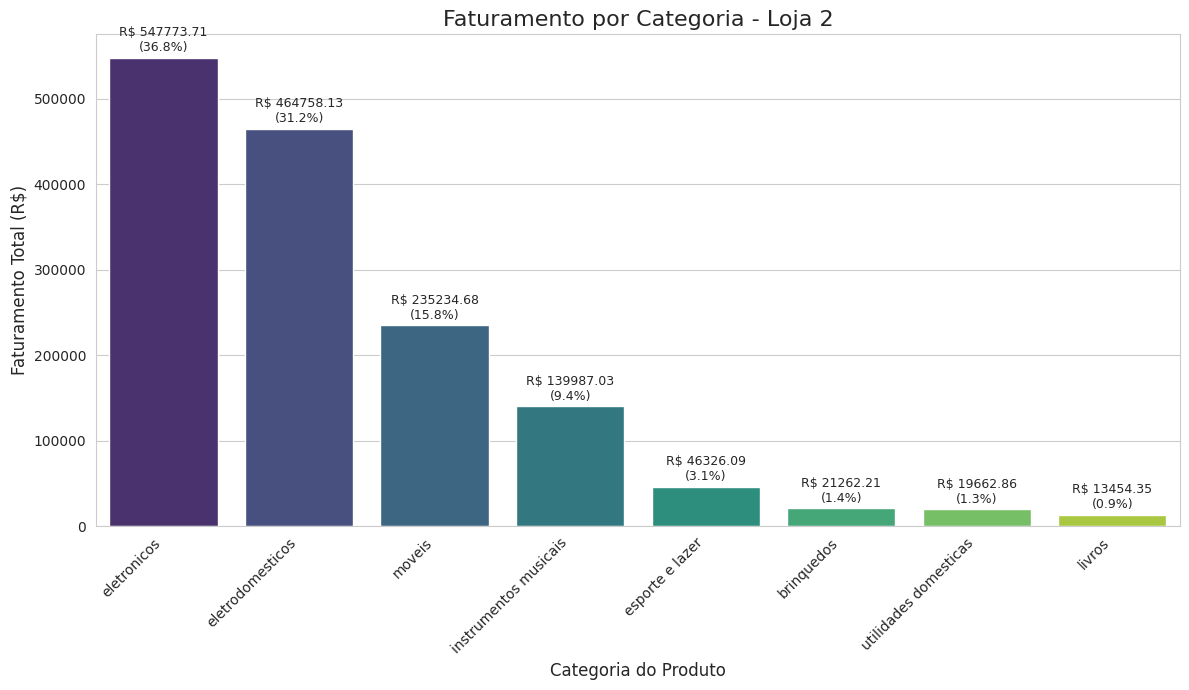

/tmp/ipython-input-3676240183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


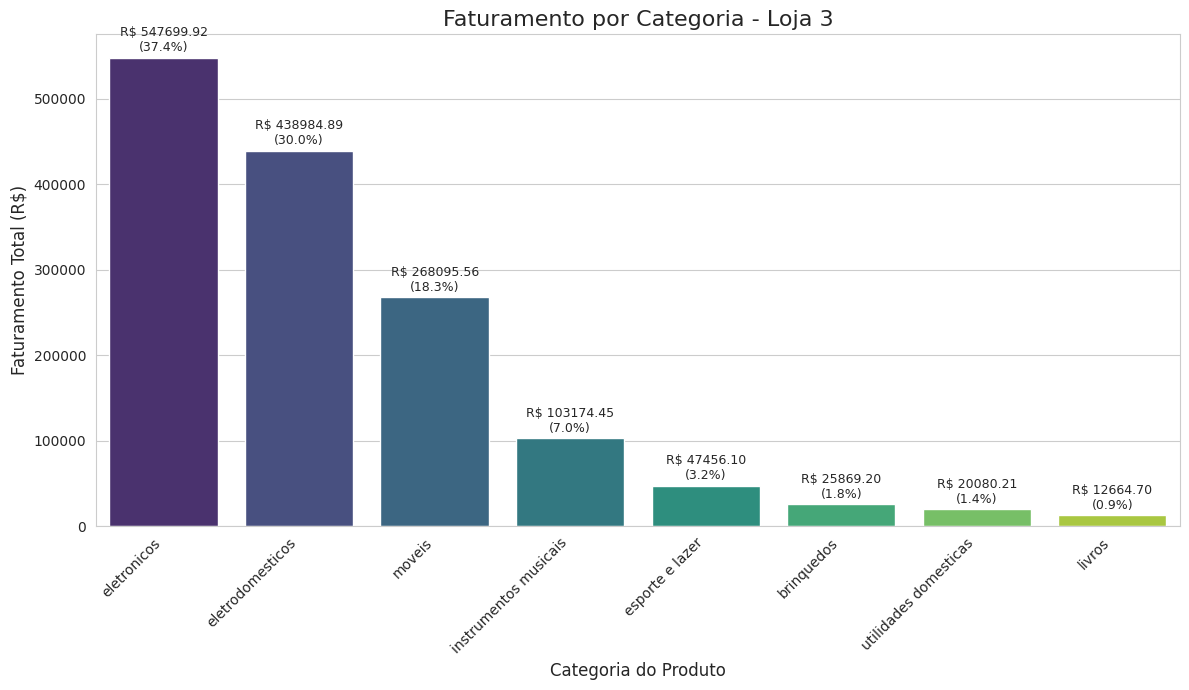

/tmp/ipython-input-3676240183.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")


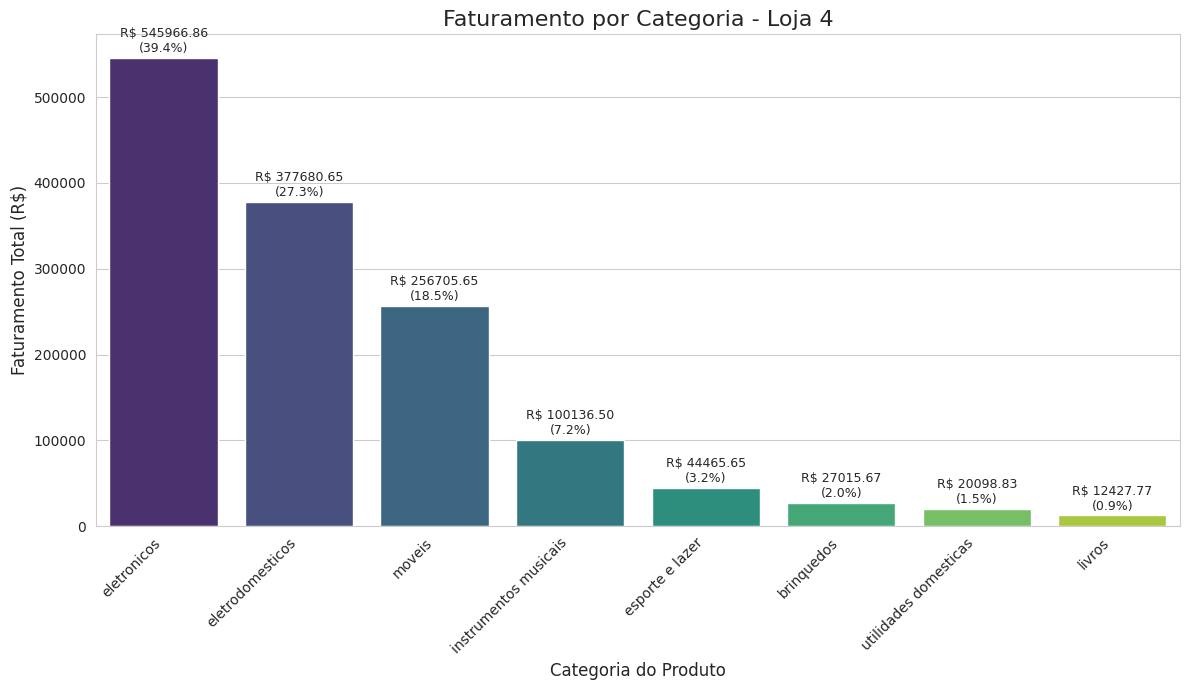

In [30]:
# Criando uma função para faturamento percentual
def plot_faturamento_percentual_categoria(df, loja_nome):
    # Calcular faturamento por categoria
    faturamento_por_categoria = df.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

    # Calcular faturamento total da loja
    faturamento_total_loja = df['Preço'].sum()

    # Calcular percentual de cada categoria
    percentual_por_categoria = (faturamento_por_categoria / faturamento_total_loja) * 100

    # Criar a figura
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=faturamento_por_categoria.index, y=faturamento_por_categoria.values, palette="viridis")
    plt.title(f'Faturamento por Categoria - {loja_nome}', fontsize=16)
    plt.xlabel('Categoria do Produto', fontsize=12)
    plt.ylabel('Faturamento Total (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Adicionar as anotações com valor e percentual
    for i, (categoria, faturamento) in enumerate(faturamento_por_categoria.items()):
        percentual = percentual_por_categoria[categoria]
        ax.text(i, faturamento + 0.05 * faturamento_total_loja * 0.1,  # Ajuste na posição vertical
                f'R$ {faturamento:.2f}\n({percentual:.1f}%)',
                ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# Plotar para cada loja
plot_faturamento_percentual_categoria(loja1_df, 'Loja 1')
plot_faturamento_percentual_categoria(loja2_df, 'Loja 2')
plot_faturamento_percentual_categoria(loja3_df, 'Loja 3')
plot_faturamento_percentual_categoria(loja4_df, 'Loja 4')

# 3. Média de Avaliação das Lojas

In [21]:
# Média de Avaliação das Lojas
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
print(f"\nMédia de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")

media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")

media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")

media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


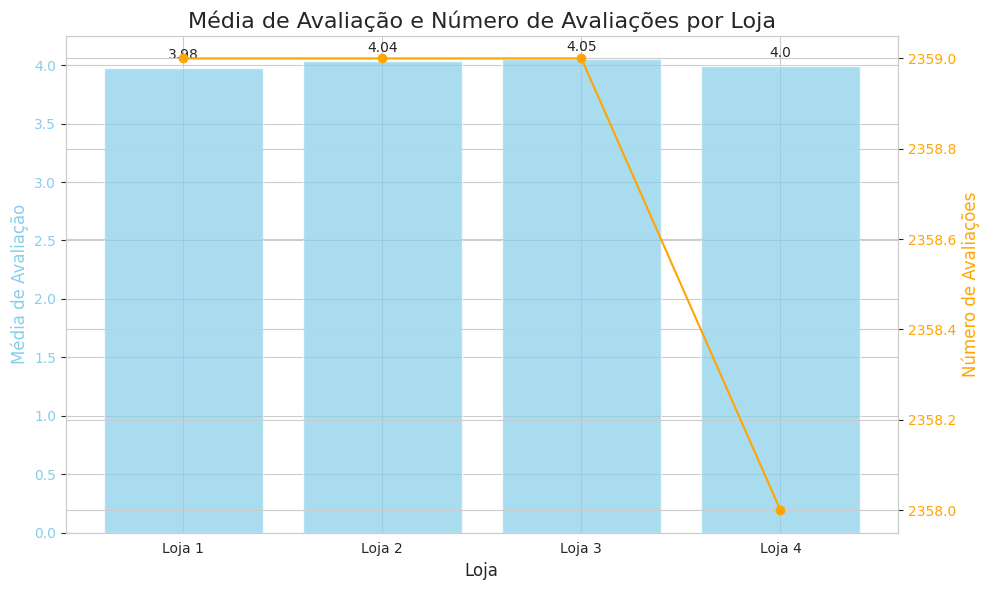

In [29]:
# Criando gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Calcular médias de avaliação
medias_avaliacao = {loja: df['Avaliação da compra'].mean() for loja, df in lojas.items()}
lojas_nomes = list(medias_avaliacao.keys())
valores_medias = list(medias_avaliacao.values())

# Plotar médias de avaliação como barras
color = 'skyblue'
ax1.set_xlabel('Loja', fontsize=12)
ax1.set_ylabel('Média de Avaliação', color=color, fontsize=12)
bars = ax1.bar(lojas_nomes, valores_medias, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Adicionar os valores da média nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Criar o segundo eixo para o número de avaliações
ax2 = ax1.twinx()
color = 'orange'
ax2.set_ylabel('Número de Avaliações', color=color, fontsize=12)
numero_avaliacoes = {loja: len(df) for loja, df in lojas.items()}
valores_numero_avaliacoes = list(numero_avaliacoes.values())
ax2.plot(lojas_nomes, valores_numero_avaliacoes, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Média de Avaliação e Número de Avaliações por Loja', fontsize=16)
fig.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [23]:
# Produtos Mais e Menos Vendidos (contando a frequência do produto)
# Loja 1
produtos_mais_vendidos_loja1 = loja['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 1 (por frequência):\n", produtos_mais_vendidos_loja1)
produtos_menos_vendidos_loja1 = loja['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 1 (por frequência):\n", produtos_menos_vendidos_loja1)

# Loja 2
produtos_mais_vendidos_loja2 = loja2['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 2 (por frequência):\n", produtos_mais_vendidos_loja2)
produtos_menos_vendidos_loja2 = loja2['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 2 (por frequência):\n", produtos_menos_vendidos_loja2)

# Loja 3
produtos_mais_vendidos_loja3 = loja3['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 3 (por frequência):\n", produtos_mais_vendidos_loja3)
produtos_menos_vendidos_loja3 = loja3['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 3 (por frequência):\n", produtos_menos_vendidos_loja3)

# Loja 4
produtos_mais_vendidos_loja4 = loja4['Produto'].value_counts().nlargest(5)
print("\nTop 5 Produtos Mais Vendidos - Loja 4 (por frequência):\n", produtos_mais_vendidos_loja4)
produtos_menos_vendidos_loja4 = loja4['Produto'].value_counts().nsmallest(5)
print("\nTop 5 Produtos Menos Vendidos - Loja 4 (por frequência):\n", produtos_menos_vendidos_loja4)


Top 5 Produtos Mais Vendidos - Loja 1 (por frequência):
 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64

Top 5 Produtos Menos Vendidos - Loja 1 (por frequência):
 Produto
Headset              33
Celular ABXY         33
Panela de pressão    35
Pandeiro             36
Mochila              39
Name: count, dtype: int64

Top 5 Produtos Mais Vendidos - Loja 2 (por frequência):
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64

Top 5 Produtos Menos Vendidos - Loja 2 (por frequência):
 Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Poltrona             35
Fone de ouvido       37
Name: count, dtype: int64

Top 5 Produtos Mais Vendidos - Loja 3 (por frequência):
 Produto
Kit banquetas      57
Mesa de jantar     56


/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


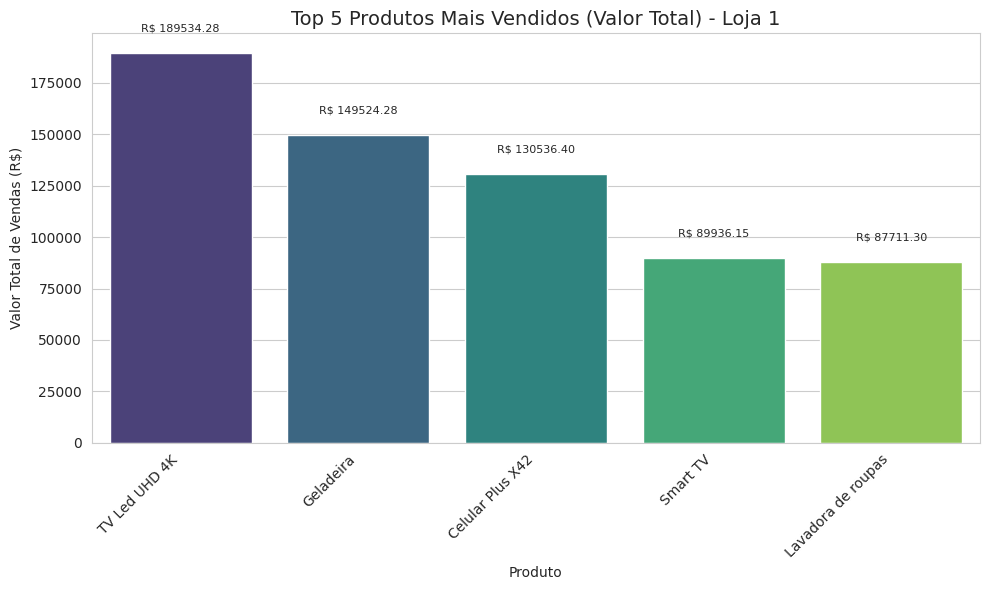

/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


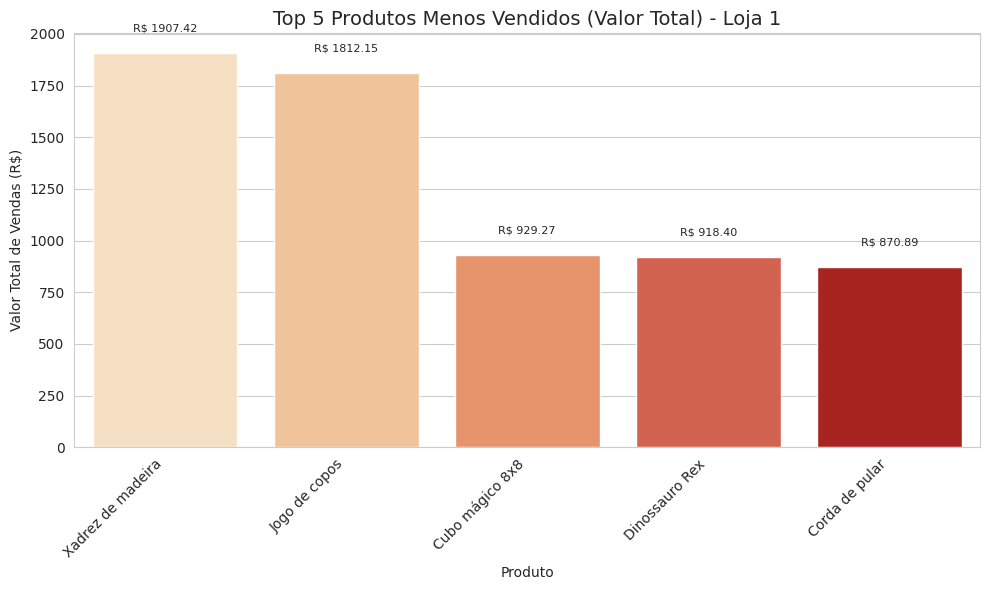

/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


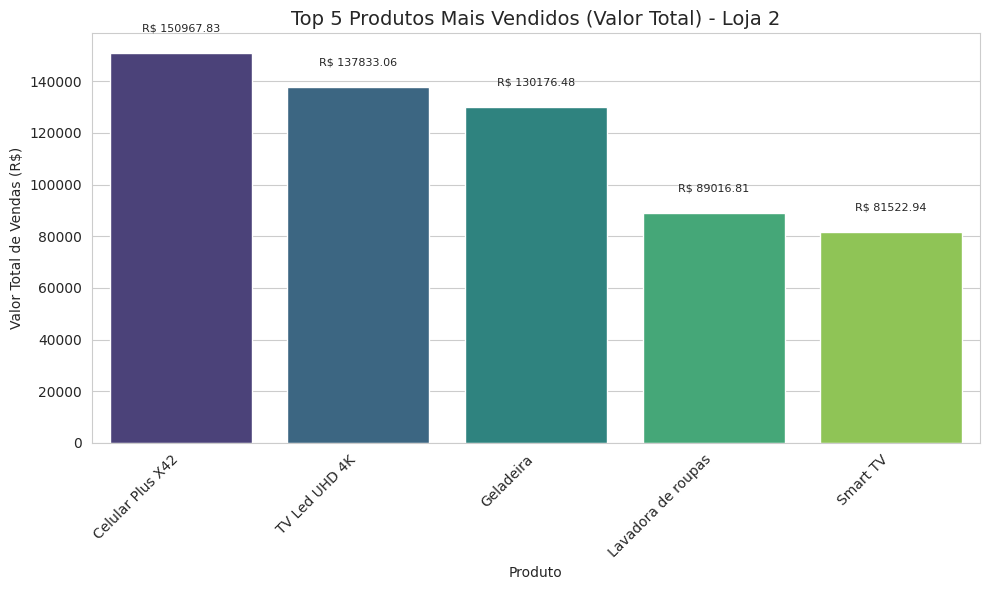

/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


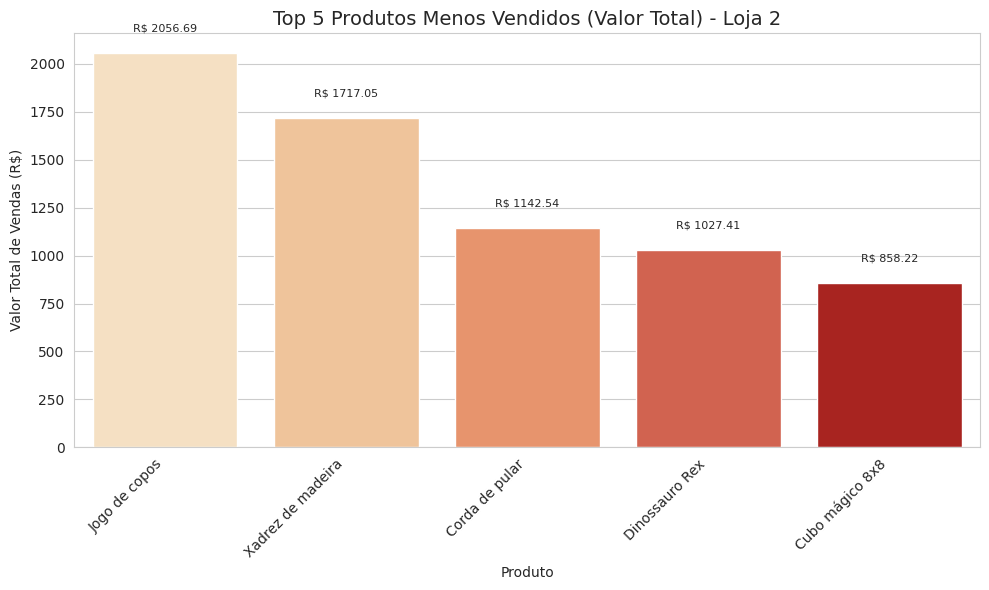

/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


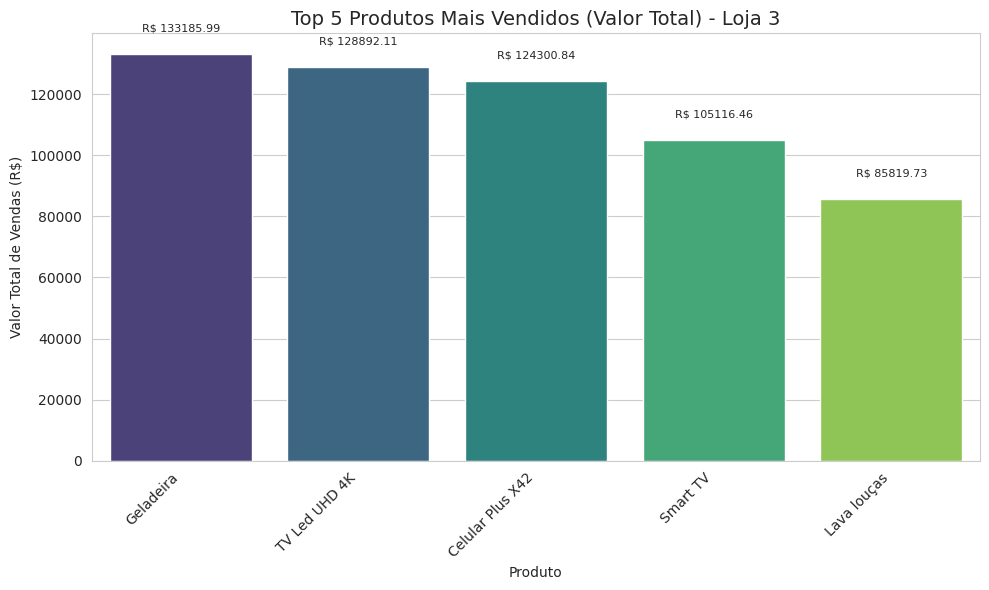

/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


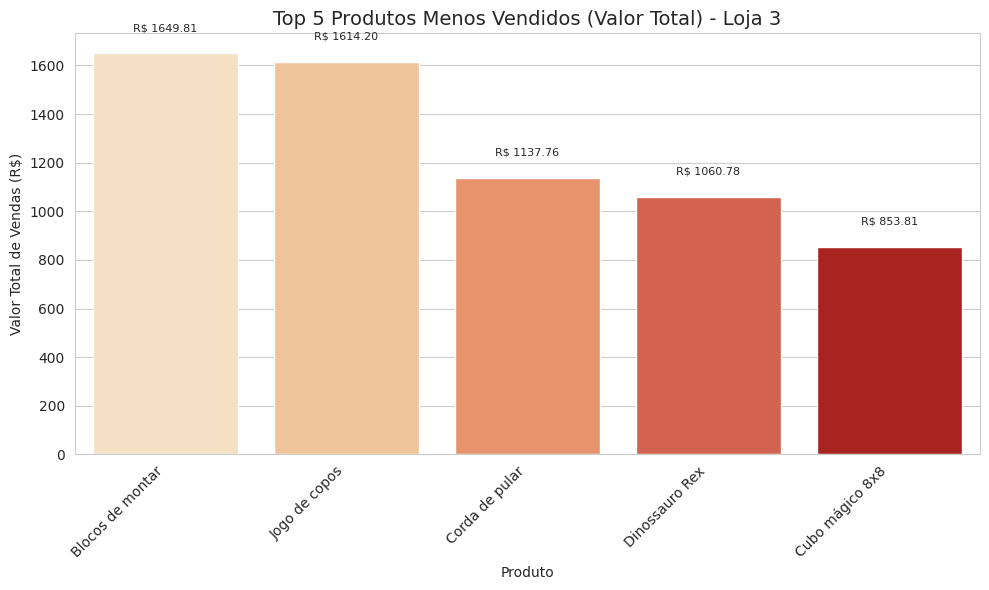

/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


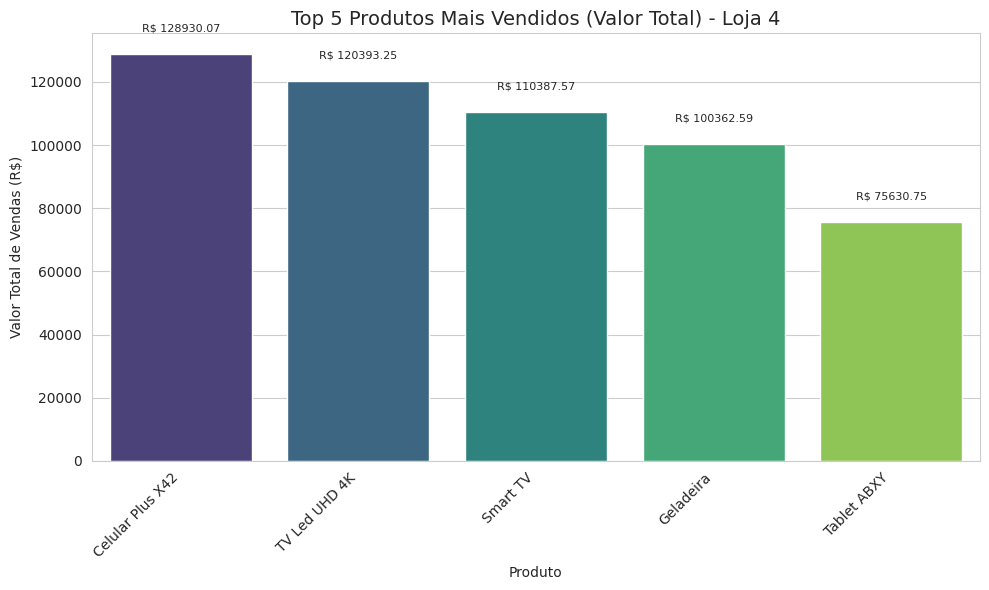

/tmp/ipython-input-1357227259.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)


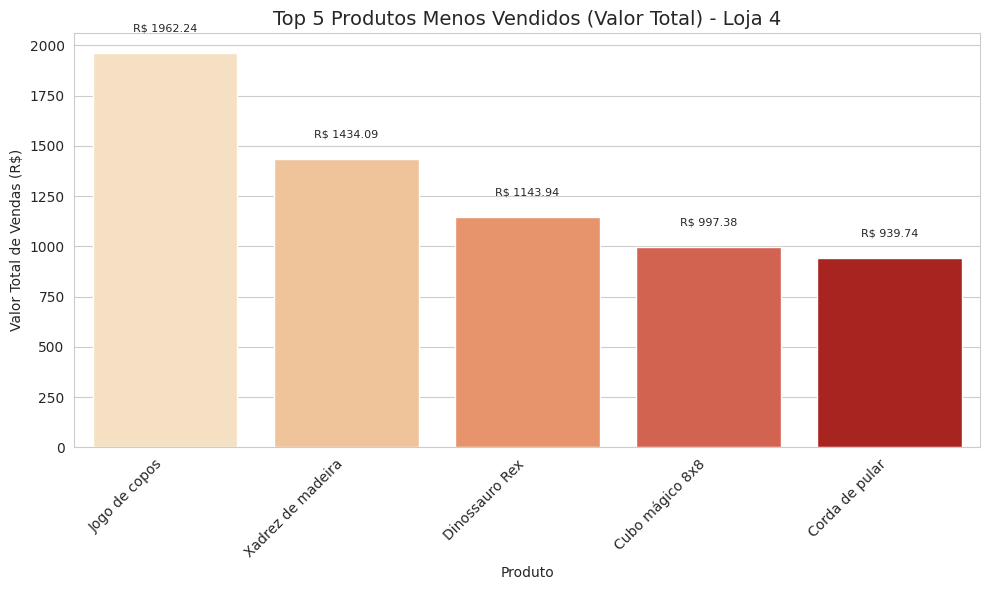

In [31]:
# Criando uma função
def plot_top_bottom_produtos_v6(df, loja_nome, top=True):
    # Calcular o valor total de vendas por produto
    produto_vendas = df.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
    n = 5

    if top:
        produtos_selecionados = produto_vendas.head(n)
        title = f'Top {n} Produtos Mais Vendidos (Valor Total) - {loja_nome}'
        palette = "viridis"
    else:
        produtos_selecionados = produto_vendas.tail(n)
        title = f'Top {n} Produtos Menos Vendidos (Valor Total) - {loja_nome}'
        palette = "OrRd"

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=produtos_selecionados.index, y=produtos_selecionados.values, palette=palette)
    plt.title(title, fontsize=14)
    plt.xlabel('Produto', fontsize=10)
    plt.ylabel('Valor Total de Vendas (R$)', fontsize=10)
    plt.xticks(rotation=45, ha='right')

    # Adicionar os valores totais de venda nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.05 * produtos_selecionados.max(),
                f'R$ {height:.2f}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Plotar para cada loja (Top 5 e Bottom 5)
for loja, df in [('Loja 1', loja1_df), ('Loja 2', loja2_df), ('Loja 3', loja3_df), ('Loja 4', loja4_df)]:
    plot_top_bottom_produtos_v6(df, loja, top=True)
    plot_top_bottom_produtos_v6(df, loja, top=False)

# 5. Frete Médio por Loja


In [25]:
# Frete Médio por Loja
frete_medio_loja1 = loja1_df['Frete'].mean()
print(f"\nFrete Médio - Loja 1: R$ {frete_medio_loja1:.2f}")

frete_medio_loja2 = loja2_df['Frete'].mean()
print(f"Frete Médio - Loja 2: R$ {frete_medio_loja2:.2f}")

frete_medio_loja3 = loja3_df['Frete'].mean()
print(f"Frete Médio - Loja 3: R$ {frete_medio_loja3:.2f}")

frete_medio_loja4 = loja4_df['Frete'].mean()
print(f"Frete Médio - Loja 4: R$ {frete_medio_loja4:.2f}")


Frete Médio - Loja 1: R$ 34.69
Frete Médio - Loja 2: R$ 33.62
Frete Médio - Loja 3: R$ 33.07
Frete Médio - Loja 4: R$ 31.28


/tmp/ipython-input-2713252008.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Frete Médio', data=data_frete_medio, palette="Blues")


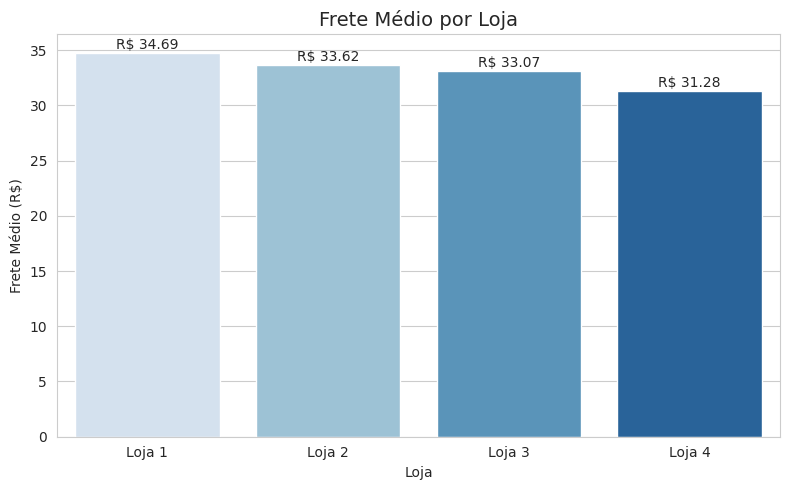

/tmp/ipython-input-2713252008.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Loja', y='Frete', data=data_frete_completo, palette="Set2")


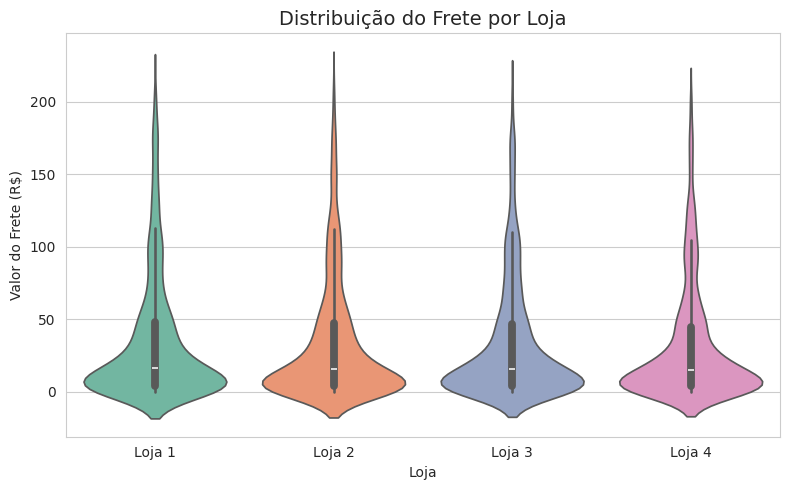

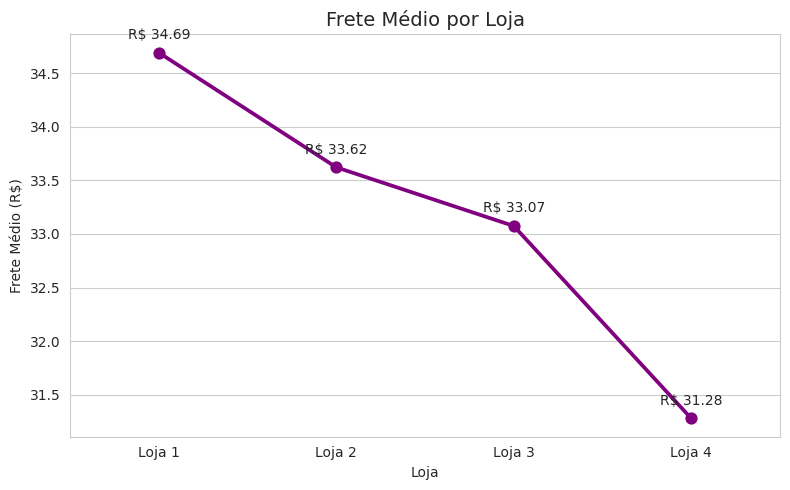

In [32]:
# Calcular a média do frete para cada loja
frete_medio_loja1 = loja1_df['Frete'].mean()
frete_medio_loja2 = loja2_df['Frete'].mean()
frete_medio_loja3 = loja3_df['Frete'].mean()
frete_medio_loja4 = loja4_df['Frete'].mean()

# Criar um DataFrame para facilitar a plotagem da média
data_frete_medio = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

# Concatenar todos os DataFrames para o violin plot
data_frete_completo = pd.concat([
    loja1_df[['Frete']].assign(Loja='Loja 1'),
    loja2_df[['Frete']].assign(Loja='Loja 2'),
    loja3_df[['Frete']].assign(Loja='Loja 3'),
    loja4_df[['Frete']].assign(Loja='Loja 4')
])

# 1. Gráfico de Barras do Frete Médio por Loja:
plt.figure(figsize=(8, 5))
sns.barplot(x='Loja', y='Frete Médio', data=data_frete_medio, palette="Blues")
plt.title('Frete Médio por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=10)
plt.ylabel('Frete Médio (R$)', fontsize=10)
for index, value in enumerate(data_frete_medio['Frete Médio']):
    plt.text(index, value + 0.1, f'R$ {value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. Violin Plot da Distribuição do Frete por Loja:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Loja', y='Frete', data=data_frete_completo, palette="Set2")
plt.title('Distribuição do Frete por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=10)
plt.ylabel('Valor do Frete (R$)', fontsize=10)
plt.tight_layout()
plt.show()

# 3. Point Plot do Frete Médio por Loja:
plt.figure(figsize=(8, 5))
sns.pointplot(x='Loja', y='Frete Médio', data=data_frete_medio, color='purple')
plt.title('Frete Médio por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=10)
plt.ylabel('Frete Médio (R$)', fontsize=10)
for i, mean_frete in enumerate(data_frete_medio['Frete Médio']):
    plt.text(i, mean_frete + 0.1, f'R$ {mean_frete:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [33]:
# Função para calcular métricas importantes para cada loja
def calcular_metricas_loja(df, nome_loja):
    receita_total = df['Preço'].sum()
    custo_total_frete = df['Frete'].sum()
    lucro_simplificado = receita_total - custo_total_frete
    avaliacao_media = df['Avaliação da compra'].mean()
    return pd.Series({
        'Loja': nome_loja,
        'Receita Total (R$)': receita_total,
        'Custo Total Frete (R$)': custo_total_frete,
        'Lucro Simplificado (R$)': lucro_simplificado,
        'Avaliação Média': avaliacao_media
    })

# Calcular as métricas para cada loja
metricas_loja1 = calcular_metricas_loja(loja1_df, 'Loja 1')
metricas_loja2 = calcular_metricas_loja(loja2_df, 'Loja 2')
metricas_loja3 = calcular_metricas_loja(loja3_df, 'Loja 3')
metricas_loja4 = calcular_metricas_loja(loja4_df, 'Loja 4')

# Criar um DataFrame com as métricas de todas as lojas
df_metricas_lojas = pd.DataFrame([metricas_loja1, metricas_loja2, metricas_loja3, metricas_loja4])

# Função para formatar valores como moeda brasileira
def formatar_moeda_br(valor):
    return f"R$ {valor:,.2f}".replace(',', '#').replace('.', ',').replace('#', '.')

# Aplicar a formatação nas colunas desejadas
df_metricas_lojas['Receita Total (R$)'] = df_metricas_lojas['Receita Total (R$)'].apply(formatar_moeda_br)
df_metricas_lojas['Lucro Simplificado (R$)'] = df_metricas_lojas['Lucro Simplificado (R$)'].apply(formatar_moeda_br)

# Exibir o DataFrame com as métricas formatadas
print(df_metricas_lojas)

     Loja Receita Total (R$)  Custo Total Frete (R$) Lucro Simplificado (R$)  \
0  Loja 1    R$ 1.534.509,12            81837.967796         R$ 1.452.671,15   
1  Loja 2    R$ 1.488.459,06            79314.158013         R$ 1.409.144,90   
2  Loja 3    R$ 1.464.025,03            78022.661223         R$ 1.386.002,37   
3  Loja 4    R$ 1.384.497,58            73755.875119         R$ 1.310.741,70   

   Avaliação Média  
0         3.976685  
1         4.037304  
2         4.048326  
3         3.995759  


# **Relatório final**

#Relatório Final Detalhado: Decisões Estratégicas para as Lojas do Sr. João 🚀

Data: 16 de Abril de 2025

Localização: New Cairo City, Cairo Governorate, Egypt 🇪🇬



Prezado Sr. João,

Este relatório tem como objetivo fornecer uma análise clara e concisa do desempenho de suas quatro lojas, com recomendações práticas para auxiliar em suas decisões estratégicas. Nosso foco principal é identificar qual loja seria a mais adequada para venda, visando levantar capital para seu novo empreendimento, além de destacar os pontos fortes e as áreas que necessitam de melhorias em cada unidade.



#1. Panorama Financeiro Simplificado: O Coração do Negócio 💰

A tabela abaixo apresenta um resumo do desempenho financeiro de cada uma de suas lojas, levando em consideração a Receita Total e o Custo Total do Frete. Lembre-se, Sr. João, que este é um olhar inicial e simplificado, mas que já nos dá pistas importantes sobre a saúde financeira de cada unidade:

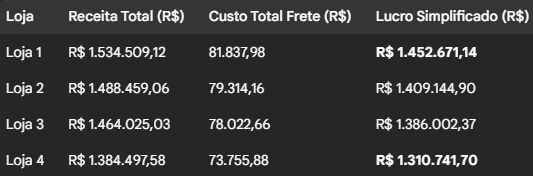

Em um olhar rápido: A Loja 1 se destaca com a maior receita total, enquanto a Loja 4 apresenta o menor 'Lucro Simplificado', que é a diferença entre a receita e o custo do frete.


Visualizando o Lucro:

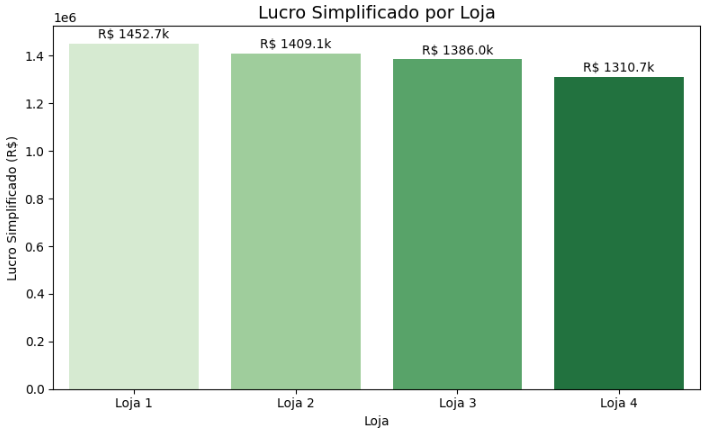

Este gráfico de barras ilustra claramente a diferença no lucro simplificado entre as lojas, com a Loja 4 apresentando a menor barra.



#2. Satisfação dos Clientes: O Termômetro do Sucesso⭐

A satisfação dos seus clientes é crucial para o sucesso a longo prazo. A tabela abaixo mostra a avaliação média das compras em cada loja:

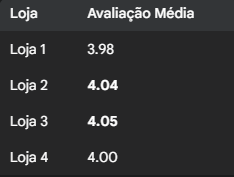

Em um olhar rápido: As Lojas 2 e 3 demonstram uma maior satisfação média dos clientes, enquanto a Loja 1 apresenta a menor avaliação.

Visualizando a Satisfação:

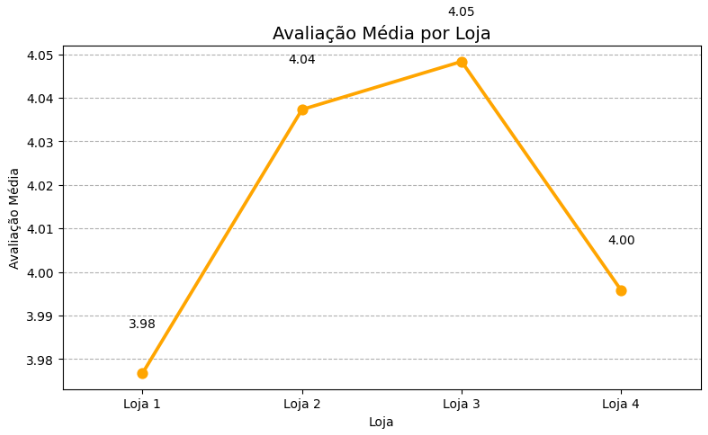



Este código Python irá gerar um point plot mostrando a avaliação média de cada loja, com o valor da média exibido acima de cada ponto.



#3. Insights sobre Produtos e Frete 🛍️🚚
Através das análises anteriores, observamos os produtos que lideram e ficam na lanterna em termos de vendas em cada loja. Essa informação é valiosa para entender a demanda e otimizar o estoque. Da mesma forma, a análise do frete médio indicou possíveis oportunidades de otimização nos custos de envio.



#4. Recomendações Estratégicas para o Sr. João 🎯
Com base em nossa análise abrangente, apresentamos as seguintes recomendações para auxiliar o Sr. João em suas decisões:


#4.1. Loja para Venda: Uma Decisão para o Futuro 🚀
Para levantar o capital necessário para seu novo empreendimento, a loja que recomendamos considerar a venda é a Loja 4.


#Análise Detalhada:

📉 Desempenho Financeiro Inferior: A Loja 4 consistentemente apresentou o menor 'Lucro Simplificado', indicando que ela contribui menos para a sua receita líquida imediata, considerando os custos de frete. Este é um fator crucial ao decidir qual ativo alienar para obter capital.


🤔 Satisfação do Cliente a Considerar: Embora a avaliação média da Loja 4 não seja a mais baixa, ela está abaixo da média das outras lojas. Isso pode indicar desafios subjacentes na experiência do cliente que podem impactar o crescimento futuro e a lucratividade da loja.

💡Nossa Sugestão: Vender a Loja 4 permitiria que o Sr. João injetasse capital em seu novo projeto sem prejudicar significativamente o desempenho financeiro geral de suas operações de varejo, focando seus esforços nas lojas com melhor performance.


#4.2. A Loja no Caminho Certo: Um Modelo a Seguir ✅

A loja que demonstra o desempenho mais promissor e consistente é a Loja 1.


#Análise Detalhada:

📈 Maior Volume de Vendas: A Loja 1 lidera em 'Receita Total', o que demonstra uma forte capacidade de atrair clientes e realizar vendas. Este é um indicador chave de um negócio saudável.


💪 Lucro Simplificado Robusto: Apesar de não ter a maior margem de lucro simplificado, o valor absoluto gerado pela Loja 1 é o mais alto, contribuindo significativamente para a sua receita total.


💡Nossa Sugestão: A Loja 1 serve como um modelo de sucesso em termos de volume de vendas. Entender as estratégias e os produtos que impulsionam esse desempenho pode ser valioso para aplicar nas outras lojas. No entanto, é crucial investigar e melhorar a avaliação média dos clientes para garantir a fidelidade e o crescimento contínuo.


#4.3. Lojas com Oportunidades de Melhoria: Alavancando o Potencial 🛠️
As lojas Loja 2 e Loja 3 apresentam um desempenho intermediário e oferecem oportunidades significativas de crescimento:


#Loja 2:

😊 Boa Satisfação do Cliente: Possui uma avaliação média dos clientes sólida, indicando que a experiência de compra é geralmente positiva.

🧐 Oportunidade no Lucro: O 'Lucro Simplificado' pode ser otimizado. Sugerimos analisar os custos operacionais e o custo dos produtos para identificar áreas de melhoria na margem de lucro. Focar nos produtos mais bem avaliados pelos clientes pode impulsionar as vendas.


#Loja 3:

🌟 Excelente Satisfação do Cliente: Lidera em avaliação média, o que é um grande trunfo. Clientes satisfeitos tendem a retornar e recomendar a loja.

📈 Potencial de Crescimento da Receita: Apesar da alta satisfação, a receita total é ligeiramente menor que a das Lojas 1 e 2. Investir em estratégias de marketing direcionadas aos produtos mais populares entre os clientes pode traduzir a alta satisfação em maior volume de vendas.
A Loja 1, como mencionado, precisa focar em elevar a avaliação dos clientes. Implementar pesquisas de satisfação, responder a feedbacks e realizar melhorias nos pontos críticos da jornada do cliente são passos essenciais.

A Loja 4, caso o Sr. João opte por não vendê-la, necessita de uma análise completa e detalhada. Investigar as razões por trás do menor lucro simplificado e da avaliação de clientes abaixo da média é fundamental para implementar um plano de recuperação eficaz.



#5. Conclusão: Rumo a Decisões Estratégicas🚀

Acredito que a venda da Loja 4 é a opção mais sensata para levantar capital, enquanto o foco em manter e aprimorar o desempenho da Loja 1 e em otimizar as operações das Lojas 2 e 3 trará resultados positivos a longo prazo.

# Fim